<a href="https://colab.research.google.com/github/sagarmahale400/Data-Science-Project-Healthcare-Insurance-Analysis/blob/main/Healthcare_Insurance_Analysis_%26_ML_Model_Building_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Sagar Mahale**

**Project : Healthcare Insurance Analysis**

**DESCRIPTION**

A significant public health concern is the rising cost of healthcare. Therefore, it's crucial to be able to predict future costs and gain a solid understanding of their causes. The insurance industry must also take this analysis seriously. This analysis may be used by healthcare insurance providers to make a variety of strategic and tactical decisions.

***Objective: ***

The objective of this project is to predict patients’ healthcare costs and to identify factors contributing to this prediction. It will also be useful to learn the interdependencies of different factors and comprehend the significance of various tools at various stages of the healthcare cost prediction process.

In [ ]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Hospitalisation=pd.read_csv("/content/Hospitalisation details.csv")

In [ ]:
Medical_Examnination=pd.read_csv("/content/Medical Examinations.csv")

In [ ]:
Names=pd.read_csv("/content/Names.csv",encoding='latin-1')

In [ ]:
Hospitalisation.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [ ]:
Hospitalisation.tail(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2342,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013


In [ ]:
Hospitalisation.shape

(2343, 9)

In [ ]:
Hospitalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [ ]:
Hospitalisation.isnull().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [ ]:
Medical_Examnination.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [ ]:
Medical_Examnination.tail()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
2330,Id2331,22.34,5.57,No,No,No,1,No
2331,Id2332,17.70,6.28,No,No,No,1,No
2332,Id2333,16.47,6.35,No,No,Yes,1,No
2333,Id2334,17.60,4.39,No,No,No,1,No
2334,Id2335,17.58,4.51,No,No,No,1,No


In [ ]:
Medical_Examnination.shape

(2335, 8)

In [ ]:
Medical_Examnination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [ ]:
Medical_Examnination.isnull().sum()

Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [ ]:
Names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [ ]:
Names.tail()

,Customer ID,name
2330,Id2331,"Brietzke, Mr. Jordan"
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr."
2332,Id2333,"Albano, Ms. Julie"
2333,Id2334,"Rosendahl, Mr. Evan P"
2334,Id2335,"German, Mr. Aaron K"


In [ ]:
Names.shape

(2335, 2)

In [ ]:
Names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


In [ ]:
Names.isnull().sum()

Customer ID    0
name           0
dtype: int64

Data science/data analysis

1. Collate the files so that all the information is in one place

In [ ]:
file_paths = ["/content/Hospitalisation details.csv", "/content/Medical Examinations.csv", "/content/Names.csv"]

# Read the first file into a dataframe
df = pd.read_csv(file_paths[0], encoding='latin-1')

# Iterate over the remaining files and merge with the existing dataframe
for file_path in file_paths[1:]:
    df_temp = pd.read_csv(file_path, encoding='latin-1')
    df = pd.merge(df, df_temp, on="Customer ID")

# Resulting merged dataframe
healthcare_insurance = df

In [ ]:
healthcare_insurance.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [ ]:
healthcare_insurance.tail()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
2334,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"


In [ ]:
healthcare_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [ ]:
healthcare_insurance.shape

(2335, 17)

2. Check for missing values in the dataset

In [ ]:
healthcare_insurance.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

In [ ]:

healthcare_insurance1 = healthcare_insurance.copy()


3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if
they do not contain significant information

In [ ]:
trivial_values = ["?", "N/A"]

# Check for trivial values in each column
for column in healthcare_insurance1.columns:
    value_counts = healthcare_insurance1[column].value_counts()
    trivial_values_counts = value_counts[value_counts.index.isin(trivial_values)]
    if not trivial_values_counts.empty:
        print(f"Trivial values in column '{column}':")
        print(trivial_values_counts)
        print()

Trivial values in column 'year':
?    2
Name: year, dtype: int64

Trivial values in column 'month':
?    3
Name: month, dtype: int64

Trivial values in column 'Hospital tier':
?    1
Name: Hospital tier, dtype: int64

Trivial values in column 'City tier':
?    1
Name: City tier, dtype: int64

Trivial values in column 'State ID':
?    2
Name: State ID, dtype: int64

Trivial values in column 'smoker':
?    2
Name: smoker, dtype: int64



In [ ]:
trivial_values = ["?"]  # Replace with your trivial values
significant_columns = ["year", "month","Hospital tier","City tier","State ID","smoker"]  # Add more column names as needed

# Replace trivial values with NaN in significant columns
healthcare_insurance1[significant_columns] = healthcare_insurance1[significant_columns].replace(trivial_values, np.nan)

# Count the number of rows with trivial values in significant columns
count_trivial = healthcare_insurance1[significant_columns].isin(trivial_values).any(axis=1).sum()
print("Count of rows with trivial values:", count_trivial)

# Drop rows with trivial values in significant columns
healthcare_insurance1.dropna(subset=significant_columns, inplace=True)

# Reset the index of the dataframe
healthcare_insurance1.reset_index(drop=True, inplace=True)


Count of rows with trivial values: 0


In [ ]:
unique_months = healthcare_insurance1['month'].unique()
print(unique_months)

['Jul' 'Nov' 'Jun' 'Sep' 'Dec' 'Aug' 'Oct']


In [ ]:
trivial_values = ["?", "N/A"]

# Check for trivial values in each column
for column in healthcare_insurance1.columns:
    value_counts = healthcare_insurance1[column].value_counts()
    trivial_values_counts = value_counts[value_counts.index.isin(trivial_values)]
    if not trivial_values_counts.empty:
        print(f"Trivial values in column '{column}':")
        print(trivial_values_counts)
        print()

4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [ ]:
#Count of features which has a datatype called Object
# Filter columns with data type as object
object_columns = healthcare_insurance1.select_dtypes(include=['object']).columns

# Get the number of features with data type as object
num_object_features = len(object_columns)

# Print the number of object features
print("Number of features with data type as object:", num_object_features)


Number of features with data type as object: 12


In [ ]:
#Listing down the names of the features which has a datatype called Object
# Filter columns with data type as object
object_columns = healthcare_insurance1.select_dtypes(include=['object']).columns

# Convert object_columns to a list
object_feature_names = object_columns.tolist()

# Print the feature names with data type as object
print("Feature names with data type as object:")
for feature_name in object_feature_names:
    print(feature_name)

Feature names with data type as object:
Customer ID
year
month
Hospital tier
City tier
State ID
Heart Issues
Any Transplants
Cancer history
NumberOfMajorSurgeries
smoker
name


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of nominal features (excluding 'name')
nominal_features = ['City tier', 'Heart Issues','Hospital tier','Any Transplants',
                    'Cancer history', 'smoker']

# Apply label encoding to nominal features
label_encoder = LabelEncoder()
for feature in nominal_features:
    healthcare_insurance1[feature] = label_encoder.fit_transform(healthcare_insurance1[feature])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order of categories
month_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Initialize the encoder with specified categories
encoder = OrdinalEncoder(categories=[month_categories])

# Perform encoding
healthcare_insurance1['month'] = encoder.fit_transform(healthcare_insurance1[['month']])

# Convert the encoded values to integer
healthcare_insurance1['month'] = healthcare_insurance1['month'].astype(int)


In [ ]:
#Changing the data types from object to integer
healthcare_insurance1['year'] = healthcare_insurance1['year'].astype(int)

In [ ]:
# Print the encoded dataset
healthcare_insurance1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,6,9,0,563.84,1,2,R1013,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K"
1,Id2334,1992,10,30,0,570.62,1,0,R1013,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"
2,Id2333,1993,5,30,0,600.00,1,0,R1013,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie"
3,Id2332,1992,8,13,0,604.54,2,2,R1013,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,6,27,0,637.26,2,2,R1013,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan"


In [ ]:
healthcare_insurance1.shape

(2325, 17)

5. The dataset has State ID, which has around 16 states. All states are not represented in
equal proportions in the data. Creating dummy variables for all regions may also result in
too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth
investigating further. Create a suitable strategy to create dummy variables with these
restraints.

In [ ]:
desired_states = ["R1011", "R1012", "R1013"]
dummy_columns = []

for state in desired_states:
    dummy_column = f"State_{state}"
    healthcare_insurance1[dummy_column] = np.where(healthcare_insurance1["State ID"] == state, 1, 0)
    dummy_columns.append(dummy_column)

In [ ]:
healthcare_insurance1= healthcare_insurance1.drop("State ID", axis=1)

6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable
method to clean up this variable.

In [ ]:
label_encoder = LabelEncoder()
healthcare_insurance1["NumberOfMajorSurgeries"] = label_encoder.fit_transform(healthcare_insurance1["NumberOfMajorSurgeries"])

In [ ]:
healthcare_insurance1.tail()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013
2320,Id6,1962,7,4,0,52590.83,0,2,32.800,6.59,0,0,0,3,1,"Baker, Mr. Russell B.",1,0,0
2321,Id5,1989,5,19,0,55135.40,0,1,35.530,5.45,0,0,0,3,1,"Kadala, Ms. Kristyn",0,1,0
2322,Id4,1991,5,6,1,58571.07,0,2,38.095,6.05,0,0,0,3,1,"Osborne, Ms. Kelsey",0,0,0
2323,Id2,1977,5,8,0,62592.87,1,2,30.360,5.77,0,0,0,3,1,"Lehner, Mr. Matthew D",0,0,1
2324,Id1,1968,9,12,0,63770.43,0,2,47.410,7.47,0,0,0,3,1,"Hawks, Ms. Kelly",0,0,1


In [ ]:
healthcare_insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int64  
 2   month                   2325 non-null   int64  
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   int64  
 7   City tier               2325 non-null   int64  
 8   BMI                     2325 non-null   float64
 9   HBA1C                   2325 non-null   float64
 10  Heart Issues            2325 non-null   int64  
 11  Any Transplants         2325 non-null   int64  
 12  Cancer history          2325 non-null   int64  
 13  NumberOfMajorSurgeries  2325 non-null   int64  
 14  smoker                  2325 non-null   

7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on
their dates of birth.

In [ ]:
#Creating thhe new column called Date_Of_Birth with the existing column called year,month and date
import pandas as pd

# Create a string column for date_of_birth by combining year, month, and date
healthcare_insurance1['date_of_birth'] = healthcare_insurance1['year'].astype(str) + '-' + healthcare_insurance1['month'].astype(str) + '-' + healthcare_insurance1['date'].astype(str)

# Convert the date_of_birth column to datetime
healthcare_insurance1['date_of_birth'] = pd.to_datetime(healthcare_insurance1['date_of_birth'], format='%Y-%m-%d')

In [ ]:
healthcare_insurance1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,date_of_birth
0,Id2335,1992,6,9,0,563.84,1,2,17.58,4.51,0,0,0,0,0,"German, Mr. Aaron K",0,0,1,1992-06-09
1,Id2334,1992,10,30,0,570.62,1,0,17.60,4.39,0,0,0,0,0,"Rosendahl, Mr. Evan P",0,0,1,1992-10-30
2,Id2333,1993,5,30,0,600.00,1,0,16.47,6.35,0,0,1,0,0,"Albano, Ms. Julie",0,0,1,1993-05-30
3,Id2332,1992,8,13,0,604.54,2,2,17.70,6.28,0,0,0,0,0,"Riveros Gonzalez, Mr. Juan D. Sr.",0,0,1,1992-08-13
4,Id2331,1998,6,27,0,637.26,2,2,22.34,5.57,0,0,0,0,0,"Brietzke, Mr. Jordan",0,0,1,1998-06-27


In [ ]:
#Creating a new column and calculating age of the customer
from datetime import datetime
# Calculate the age based on the current year
current_year = datetime.now().year
healthcare_insurance1['age'] = current_year - healthcare_insurance1['date_of_birth'].dt.year

In [ ]:
healthcare_insurance1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,date_of_birth,age
0,Id2335,1992,6,9,0,563.84,1,2,17.58,4.51,...,0,0,0,0,"German, Mr. Aaron K",0,0,1,1992-06-09,31
1,Id2334,1992,10,30,0,570.62,1,0,17.60,4.39,...,0,0,0,0,"Rosendahl, Mr. Evan P",0,0,1,1992-10-30,31
2,Id2333,1993,5,30,0,600.00,1,0,16.47,6.35,...,0,1,0,0,"Albano, Ms. Julie",0,0,1,1993-05-30,30
3,Id2332,1992,8,13,0,604.54,2,2,17.70,6.28,...,0,0,0,0,"Riveros Gonzalez, Mr. Juan D. Sr.",0,0,1,1992-08-13,31
4,Id2331,1998,6,27,0,637.26,2,2,22.34,5.57,...,0,0,0,0,"Brietzke, Mr. Jordan",0,0,1,1998-06-27,25


8. The gender of the patient may be an important factor in determining the cost of
hospitalization. The salutations in a beneficiary's name can be used to determine their
gender. Make a new field for the beneficiary's gender.

In [ ]:
#Created a new column called gender with the help of the existing features called name
# Extract salutations from the name column
salutations = healthcare_insurance1['name'].str.extract(r'(Mr\.|Ms\.|Mrs\.)', expand=False)

# Create a new column for beneficiary's gender based on salutations
gender_mapping = {'Mr.': 'Male', 'Ms.': 'Female', 'Mrs.': 'Female'}
healthcare_insurance1['gender'] = salutations.map(gender_mapping)

In [ ]:
healthcare_insurance1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,date_of_birth,age,gender
0,Id2335,1992,6,9,0,563.84,1,2,17.58,4.51,...,0,0,0,"German, Mr. Aaron K",0,0,1,1992-06-09,31,Male
1,Id2334,1992,10,30,0,570.62,1,0,17.60,4.39,...,0,0,0,"Rosendahl, Mr. Evan P",0,0,1,1992-10-30,31,Male
2,Id2333,1993,5,30,0,600.00,1,0,16.47,6.35,...,1,0,0,"Albano, Ms. Julie",0,0,1,1993-05-30,30,Female
3,Id2332,1992,8,13,0,604.54,2,2,17.70,6.28,...,0,0,0,"Riveros Gonzalez, Mr. Juan D. Sr.",0,0,1,1992-08-13,31,Male
4,Id2331,1998,6,27,0,637.26,2,2,22.34,5.57,...,0,0,0,"Brietzke, Mr. Jordan",0,0,1,1998-06-27,25,Male


9) You should also visualize the distribution of costs using a histogram, box and whisker plot,
and swarm plot.

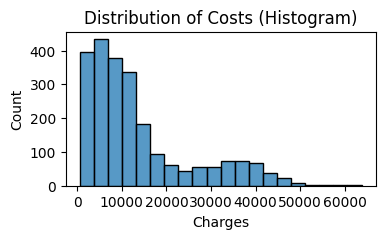

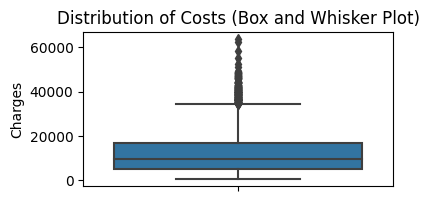

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


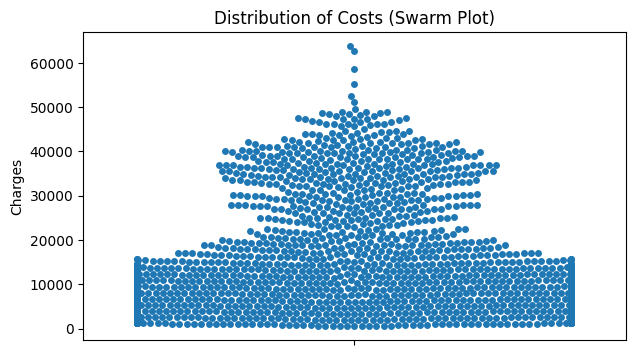

In [ ]:
# Histogram
plt.figure(figsize=(4, 2))
sns.histplot(data=healthcare_insurance1, x='charges', bins=20)
plt.title('Distribution of Costs (Histogram)')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Box and Whisker Plot
plt.figure(figsize=(4, 2))
sns.boxplot(data=healthcare_insurance1, y='charges')
plt.title('Distribution of Costs (Box and Whisker Plot)')
plt.ylabel('Charges')
plt.show()

# Swarm Plot
plt.figure(figsize=(7, 4))
sns.swarmplot(data=healthcare_insurance1, y='charges')
plt.title('Distribution of Costs (Swarm Plot)')
plt.ylabel('Charges')
plt.show()

10. State how the distribution is different across gender and tiers of hospitals.

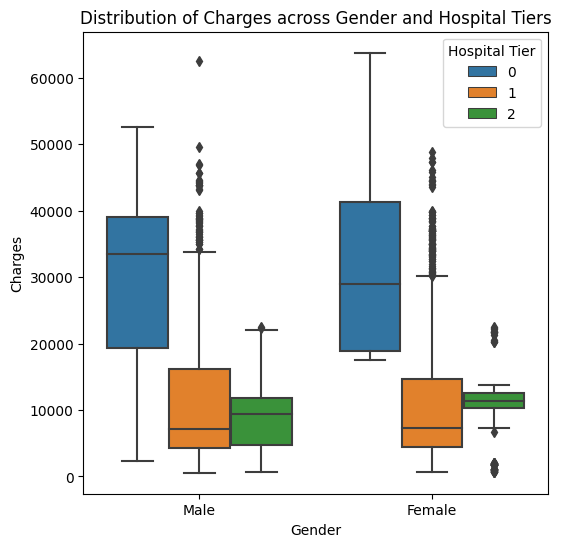

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


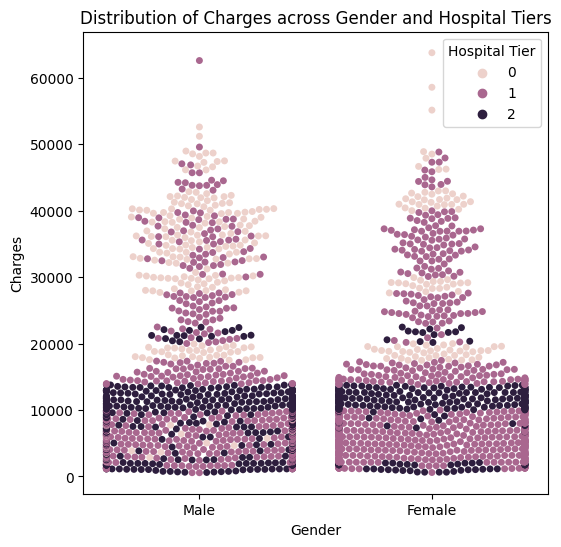

In [ ]:
# Box plot by gender and hospital tier
plt.figure(figsize=(6, 6))
sns.boxplot(data=healthcare_insurance1, x='gender', y='charges', hue='Hospital tier')
plt.title('Distribution of Charges across Gender and Hospital Tiers')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.legend(title='Hospital Tier')
plt.show()

# Swarm plot by gender and hospital tier
plt.figure(figsize=(6, 6))
sns.swarmplot(data=healthcare_insurance1, x='gender', y='charges', hue='Hospital tier')
plt.title('Distribution of Charges across Gender and Hospital Tiers')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.legend(title='Hospital Tier')
plt.show()

11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

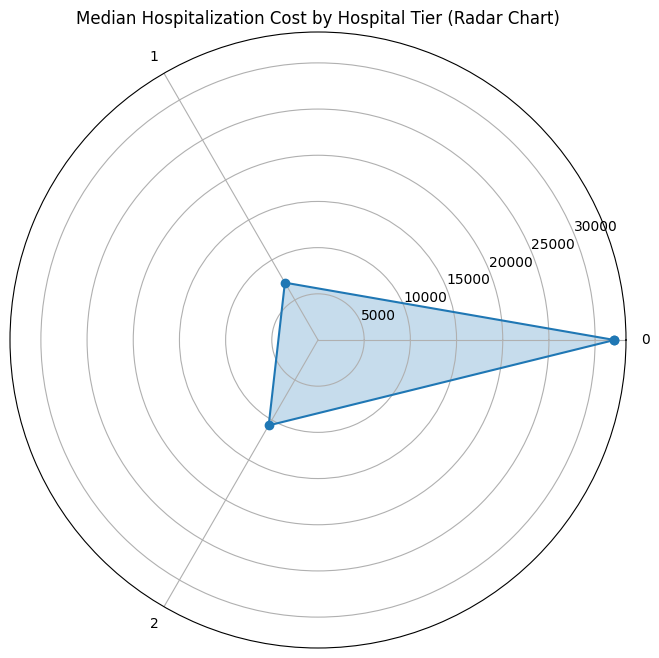

In [ ]:
# Group the data by hospital tier and calculate the median cost
median_costs = healthcare_insurance1.groupby('Hospital tier')['charges'].median()

# Set the number of variables (hospital tiers)
num_variables = len(median_costs)

# Create an array of angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_variables, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

# Create an array of median costs for each tier
median_values = median_costs.values.tolist()
median_values += median_values[:1]  # Repeat the first value to close the circle

# Plot the radar chart
plt.figure(figsize=(8, 8))
plt.polar(angles, median_values, marker='o')
plt.fill(angles, median_values, alpha=0.25)

# Set the labels for each angle (hospital tiers)
labels = median_costs.index.tolist()
plt.xticks(angles[:-1], labels)

# Set the title and display the chart
plt.title('Median Hospitalization Cost by Hospital Tier (Radar Chart)')
plt.show()

12. Create a frequency table and a stacked bar chart to visualize the count of people in the
different tiers of cities and hospitals.

Hospital tier    0    1    2
City tier                   
0               85  403  241
1              106  479  222
2              109  452  228


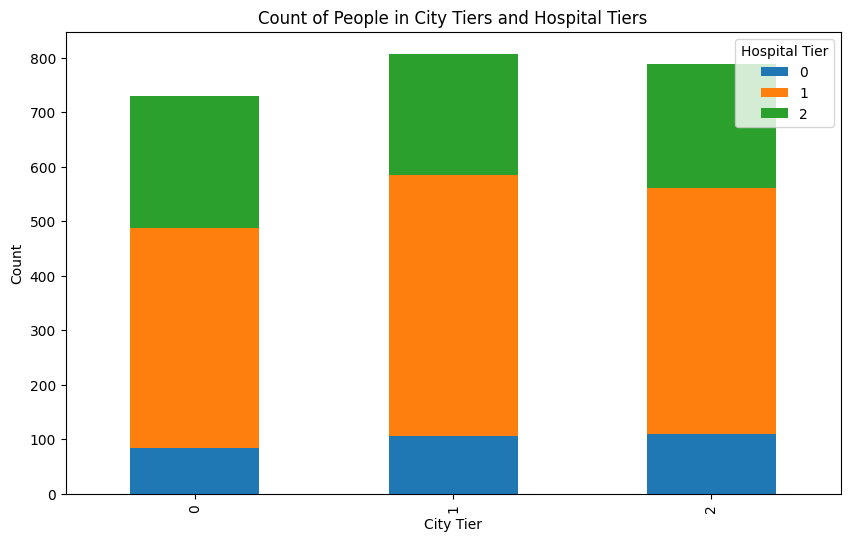

In [ ]:
# Create a frequency table of counts for city tiers and hospital tiers
frequency_table = pd.crosstab(healthcare_insurance1['City tier'], healthcare_insurance1['Hospital tier'])

# Print the frequency table
print(frequency_table)

# Create a stacked bar chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of People in City Tiers and Hospital Tiers')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.legend(title='Hospital Tier')
plt.show()


13) Test the following null hypotheses:

a. The average hospitalization costs for the three types of hospitals are not significantly
different.

In [ ]:
from scipy import stats

# Extract the hospitalization costs for each hospital tier
hospital_tier_0 = healthcare_insurance1.loc[healthcare_insurance1['Hospital tier'] == 0, 'charges']
hospital_tier_1 = healthcare_insurance1.loc[healthcare_insurance1['Hospital tier'] == 1, 'charges']
hospital_tier_2 = healthcare_insurance1.loc[healthcare_insurance1['Hospital tier'] == 2, 'charges']

# Perform the ANOVA test
_, p_value = stats.f_oneway(hospital_tier_0, hospital_tier_1, hospital_tier_2)

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print("The average hospitalization costs for the three types of hospitals are not significantly different.")
else:
    print("The average hospitalization costs for the three types of hospitals are significantly different.")


The average hospitalization costs for the three types of hospitals are significantly different.


b. The average hospitalization costs for the three types of cities are not significantly different.

In [ ]:
# Extract the hospitalization costs for each city tier
city_tier_0 = healthcare_insurance1.loc[healthcare_insurance1['City tier'] == 0, 'charges']
city_tier_1 = healthcare_insurance1.loc[healthcare_insurance1['City tier'] == 1, 'charges']
city_tier_2 = healthcare_insurance1.loc[healthcare_insurance1['City tier'] == 2, 'charges']

# Perform the ANOVA test
_, p_value = stats.f_oneway(city_tier_0, city_tier_1, city_tier_2)

# Check the p-value
if p_value > alpha:
    print("The average hospitalization costs for the three types of cities are not significantly different.")
else:
    print("The average hospitalization costs for the three types of cities are significantly different.")

The average hospitalization costs for the three types of cities are not significantly different.


c. The average hospitalization cost for smokers is not significantly different from the
average cost for nonsmokers.

In [ ]:
#import the appropriate libraries
import scipy.stats as stats

# Separate the hospitalization costs for smokers and nonsmokers
smoker_costs = healthcare_insurance1.loc[healthcare_insurance1['smoker'] == 1, 'charges']
non_smoker_costs = healthcare_insurance1.loc[healthcare_insurance1['smoker'] == 0, 'charges']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(smoker_costs, non_smoker_costs, equal_var=False)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


d. Smoking and heart issues are independent

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(healthcare_insurance1['smoker'], healthcare_insurance1['Heart Issues'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


Machine Learning


In [ ]:
healthcare_insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             2325 non-null   object        
 1   year                    2325 non-null   int64         
 2   month                   2325 non-null   int64         
 3   date                    2325 non-null   int64         
 4   children                2325 non-null   int64         
 5   charges                 2325 non-null   float64       
 6   Hospital tier           2325 non-null   int64         
 7   City tier               2325 non-null   int64         
 8   BMI                     2325 non-null   float64       
 9   HBA1C                   2325 non-null   float64       
 10  Heart Issues            2325 non-null   int64         
 11  Any Transplants         2325 non-null   int64         
 12  Cancer history          2325 non-null   int64   

In [ ]:
#Dropping the unwanted features from the datasets

# Specify the list of columns to be dropped
columns_to_drop = ['Customer ID', 'month', 'year', 'date', 'name', 'date_of_birth']

# Drop the specified columns
healthcare_insurance1 = healthcare_insurance1.drop(columns=columns_to_drop)


In [ ]:
 # Replace the values in the "gender" column
healthcare_insurance1['gender'] = healthcare_insurance1['gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
healthcare_insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital tier           2325 non-null   int64  
 3   City tier               2325 non-null   int64  
 4   BMI                     2325 non-null   float64
 5   HBA1C                   2325 non-null   float64
 6   Heart Issues            2325 non-null   int64  
 7   Any Transplants         2325 non-null   int64  
 8   Cancer history          2325 non-null   int64  
 9   NumberOfMajorSurgeries  2325 non-null   int64  
 10  smoker                  2325 non-null   int64  
 11  State_R1011             2325 non-null   int64  
 12  State_R1012             2325 non-null   int64  
 13  State_R1013             2325 non-null   int64  
 14  age                     2325 non-null   

In [ ]:
healthcare_insurance1.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_R1011,State_R1012,State_R1013,age,gender
0,0,563.84,1,2,17.58,4.51,0,0,0,0,0,0,0,1,31,1
1,0,570.62,1,0,17.60,4.39,0,0,0,0,0,0,0,1,31,1
2,0,600.00,1,0,16.47,6.35,0,0,1,0,0,0,0,1,30,0
3,0,604.54,2,2,17.70,6.28,0,0,0,0,0,0,0,1,31,1
4,0,637.26,2,2,22.34,5.57,0,0,0,0,0,0,0,1,25,1


In [ ]:
healthcare_insurance1.describe()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_R1011,State_R1012,State_R1013,age,gender
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,1.025376,13521.660254,1.168172,1.025806,30.995630,6.576718,0.395699,0.061075,0.168172,1.516559,0.209032,0.246882,0.246022,0.261935,40.243011,0.498925
std,1.234456,11863.492697,0.630972,0.807786,8.744938,2.226892,0.489105,0.239520,0.374099,1.413394,0.406705,0.431290,0.430784,0.439782,13.371684,0.500106
min,0.000000,563.840000,0.000000,0.000000,15.010000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,5116.500000,1.000000,0.000000,24.605000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
50%,0.000000,9634.540000,1.000000,1.000000,30.400000,5.810000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,2.000000,16903.500000,2.000000,2.000000,36.300000,7.950000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,52.000000,1.000000
max,5.000000,63770.430000,2.000000,2.000000,55.050000,12.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000


1. Examine the correlation between predictors to identify highly correlated predictors. Use a
heatmap to visualize this.

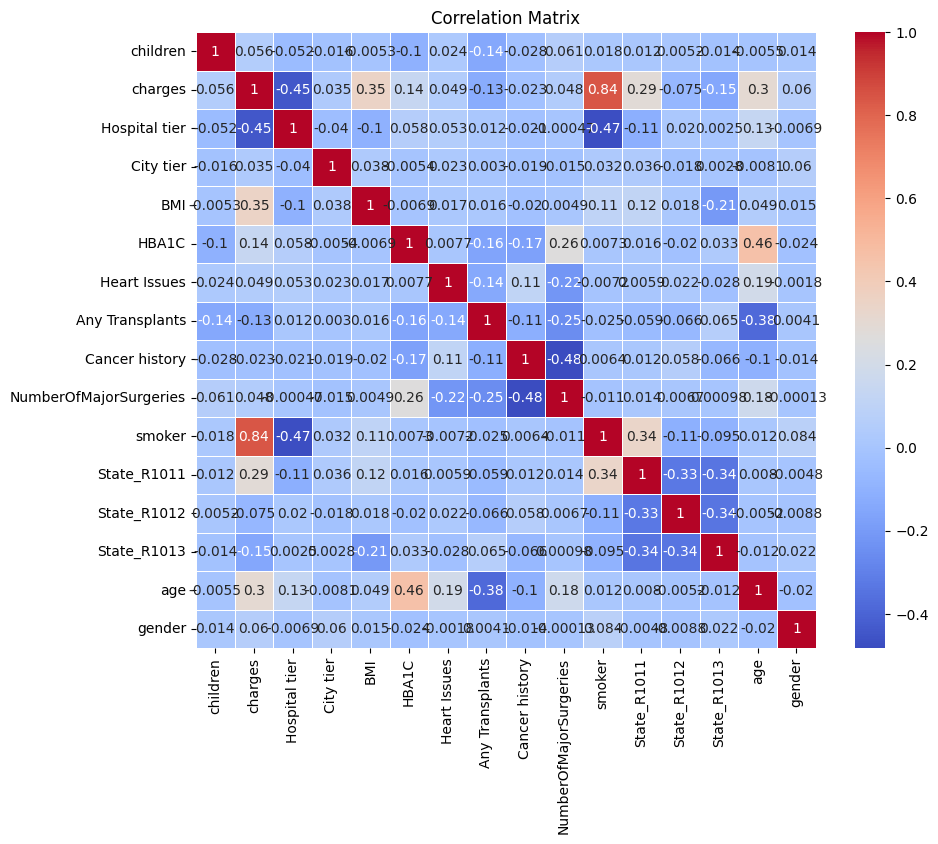

In [ ]:
# Calculate the correlation matrix
correlation_matrix = healthcare_insurance1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


2. Develop and evaluate the final model using regression with a stochastic gradient descent
optimizer. Also, ensure that you apply all the following suggestions:

Note:

• Perform the stratified 5-fold cross-validation technique for model building and validation

• Use standardization and hyperparameter tuning effectively

• Use sklearn-pipelines

• Use appropriate regularization techniques to address the bias-variance trade-off

a. Create five folds in the data, and introduce a variable to identify the folds

b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model
and the remaining 20 percent is used to validate it in each iteration

c. Develop five distinct models and five distinct validation scores (root mean squared error values)

d. Determine the variable importance scores, and identify the redundant variables


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming the target variable is 'charges' and other features are stored in 'X' DataFrame
X = healthcare_insurance1.drop('charges', axis=1)
y = healthcare_insurance1['charges']

# Create five folds and identify the folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a new column 'fold' to identify the folds
X['fold'] = 0  # Initialize fold column with 0

for fold, (_, valid_index) in enumerate(skf.split(X, X['Hospital tier'])):
    X.loc[valid_index, 'fold'] = fold + 1

# Perform model training and validation using a for loop
models = []
validation_scores = []

for fold in range(1, 6):
    # Split the data into training and validation sets for the current fold
    train_data = X[X['fold'] != fold]
    valid_data = X[X['fold'] == fold]

    X_train = train_data.drop(['fold'], axis=1)  # Remove 'fold' column from training data
    y_train = y[train_data.index]
    X_valid = valid_data.drop(['fold'], axis=1)
    y_valid = y[valid_data.index]

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Apply standardization to features
        ('regressor', SGDRegressor(random_state=42))  # Use SGDRegressor as the model
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the validation data
    y_pred = pipeline.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)

    # Store the model and validation score
    models.append(pipeline)
    validation_scores.append(rmse)

# Calculate variable importance scores
last_model = models[-1]
importance_scores = last_model.named_steps['regressor'].coef_

# Identify redundant variables based on importance scores
redundant_variables = X_train.columns[importance_scores < 0.1]

# Print the validation scores
for fold, score in enumerate(validation_scores):
    print(f"Validation score for fold {fold+1}: {score}")

# Print the variable importance scores
for feature, importance in zip(X_train.columns, importance_scores):
    print(f"Variable importance for {feature}: {importance}")

# Print the redundant variables
print("Redundant variables:")
for variable in redundant_variables:
    print(variable)

Validation score for fold 1: 4154.520127394819
Validation score for fold 2: 4534.0510998290665
Validation score for fold 3: 3966.5883944167135
Validation score for fold 4: 4444.165380075224
Validation score for fold 5: 5174.156992704833
Variable importance for children: 481.9857511512666
Variable importance for Hospital tier: -1154.984881228374
Variable importance for City tier: -4.147861521033621
Variable importance for BMI: 2820.5968868681243
Variable importance for HBA1C: 231.52607041938455
Variable importance for Heart Issues: 64.73663328838572
Variable importance for Any Transplants: 259.6476152332051
Variable importance for Cancer history: 134.42000860581652
Variable importance for NumberOfMajorSurgeries: 218.4246526871037
Variable importance for smoker: 9127.7469037107
Variable importance for State_R1011: -440.6858241956766
Variable importance for State_R1012: -160.63305061660458
Variable importance for State_R1013: -541.1137925474679
Variable importance for age: 3505.5834380055

3. Use random forest and extreme gradient boosting for cost prediction, share your crossvalidation results, and calculate the variable importance scores

4. Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is
12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s
State ID is R1011. She lives with her partner and two children. She was found to be
nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no
transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be
estimated using tier-1 hospitals.

5. Find the predicted hospitalization cost using all five models. The predicted value should be
the mean of the five models' predicted values

In [ ]:
healthcare_insurance2 = healthcare_insurance1.copy()

In [ ]:
healthcare_insurance2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital tier           2325 non-null   int64  
 3   City tier               2325 non-null   int64  
 4   BMI                     2325 non-null   float64
 5   HBA1C                   2325 non-null   float64
 6   Heart Issues            2325 non-null   int64  
 7   Any Transplants         2325 non-null   int64  
 8   Cancer history          2325 non-null   int64  
 9   NumberOfMajorSurgeries  2325 non-null   int64  
 10  smoker                  2325 non-null   int64  
 11  State_R1011             2325 non-null   int64  
 12  State_R1012             2325 non-null   int64  
 13  State_R1013             2325 non-null   int64  
 14  age                     2325 non-null   

In [ ]:
# Drop multiple columns from healthcare_insurance1_copy
columns_to_drop = ['State_R1012', 'State_R1013']  # Replace with the actual column names you want to drop
healthcare_insurance2.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Assuming the target variable is 'charges' and other features are stored in 'X' DataFrame
X = healthcare_insurance2.drop('charges', axis=1)
y = healthcare_insurance2['charges']

# Task 3: Cross-validation and variable importance scores using Random Forest and XGBoost
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Task 4: Estimate hospitalization cost for a specific case scenario
case_data = pd.DataFrame({
    'children': [2],
    'BMI': [85],
    'HBA1C': [5.8],
    'Heart Issues': [0],
    'Any Transplants': [0],
    'Cancer history': [1],
    'NumberOfMajorSurgeries': [0],
    'smoker': [1],
    'Hospital tier': [0],
    'City tier': [0],
    'State_R1011': [1],
    'age': [datetime.now().year - 1988],
    'gender': [0]  # Assuming Ms. Jayna is female (0 for female, 1 for male)
})

# Reorder the columns in case_data to match the feature order in X
case_data = case_data[X.columns]

# Task 5: Predict hospitalization cost using all five models
models = [rf_model, xgb_model]
predicted_costs = []

for model in models:
    model.fit(X, y)
    predicted_cost = model.predict(case_data)
    predicted_costs.append(predicted_cost)

# Calculate the mean of predicted costs from all models
mean_predicted_cost = sum(predicted_costs) / len(predicted_costs)


In [ ]:
print("Mean Predicted Cost: ", mean_predicted_cost)


Mean Predicted Cost:  [40252.2702375]
